In [ ]:
# Core
import os, sys, pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Make plots a bit nicer
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.grid"] = True

# Paths (relative to project root)
PROJECT_ROOT = pathlib.Path().resolve().parents[0]   # current project root
RAW_PATH = PROJECT_ROOT / "data" / "raw" / "car.csv"

print("Project root:", PROJECT_ROOT)
print("Raw dataset:", RAW_PATH)


Project root: C:\Users\User\Desktop\Projects\Car_Price
Raw dataset: C:\Users\User\Desktop\Projects\Car_Price\data\raw\car.csv


In [2]:
# Read CSV (adjust sep/encoding if needed)
df = pd.read_csv(RAW_PATH)

print("Rows, Columns:", df.shape)
df.head(10)


Rows, Columns: (50100, 25)


,Brand,Model,Year,CarAge,Condition,Mileage(km),EngineSize(L),FuelType,Horsepower,Torque,...,Color,Interior,Options,City,AccidentHistory,Insurance,RegistrationStatus,FuelEfficiency(L/100km),PricePerKm,Price($)
0,Porsche,Panamera,2008,17,Used,256395,3.3,Gasoline,513,395,...,White,Cloth,"Navigation, Cruise Control, Heated Seats, Blue...",Tehran,No,Valid,Incomplete,11.96,0.05,13884
1,Audi,A6,2023,2,Used,20433,2.2,Diesel,302,270,...,Black,Cloth,"Parking Sensors, Cruise Control, Touchscreen",Berlin,Yes,Expired,Incomplete,8.74,1.90,38888
2,BMW,X5,2022,3,Used,52328,3.2,Gasoline,400,388,...,Gray,Leather,"Touchscreen, Bluetooth, Cruise Control, Naviga...",Tokyo,Yes,Valid,Complete,15.68,0.63,33074
3,Hyundai,Tucson,2019,6,Used,91878,1.6,Hybrid,187,219,...,Silver,Cloth,"Sunroof, Rear Camera, Bluetooth, Parking Senso...",Delhi,No,Expired,Complete,9.45,0.14,12966
4,Fiat,500,2012,13,Damaged,192331,1.1,Gasoline,90,112,...,Red,Leather,"Heated Seats, Touchscreen",Delhi,No,Valid,Complete,7.16,0.01,2670
5,Porsche,911 Carrera,2018,7,Used,110968,3.3,Gasoline,565,392,...,White,Cloth,Sunroof,Paris,No,Expired,Incomplete,12.69,0.43,47830
6,Mercedes-Benz,S-Class,2019,6,Used,82607,5.8,Hybrid,509,750,...,Silver,Cloth,"Navigation, Parking Sensors, Touchscreen",Los Angeles,Yes,Expired,Complete,17.83,0.62,51189
7,Porsche,Panamera,2014,11,Used,163074,3.5,Gasoline,513,428,...,Red,Cloth,"Bluetooth, Touchscreen, Cruise Control, Heated...",Tokyo,No,Valid,Complete,13.06,0.17,27296
8,Audi,Q7,2007,18,Used,274471,2.0,Gasoline,315,277,...,Red,Leather,"Touchscreen, Bluetooth",Tokyo,Yes,Expired,Incomplete,10.38,0.02,5389
9,Ford,Mustang,2019,6,Used,95498,4.6,Gasoline,364,588,...,Red,Cloth,"Touchscreen, Cruise Control, Navigation, Bluet...",Berlin,Yes,Valid,Complete,14.90,0.11,10704


In [3]:
print("Column names:", list(df.columns))
print("\nData types:")
display(df.dtypes)

print("\nSample rows:")
display(df.sample(5, random_state=42))


Column names: ['Brand', 'Model', 'Year', 'CarAge', 'Condition', 'Mileage(km)', 'EngineSize(L)', 'FuelType', 'Horsepower', 'Torque', 'Transmission', 'DriveType', 'BodyType', 'Doors', 'Seats', 'Color', 'Interior', 'Options', 'City', 'AccidentHistory', 'Insurance', 'RegistrationStatus', 'FuelEfficiency(L/100km)', 'PricePerKm', 'Price($)']

Data types:


Brand                       object
Model                       object
Year                         int64
CarAge                       int64
Condition                   object
Mileage(km)                  int64
EngineSize(L)              float64
FuelType                    object
Horsepower                   int64
Torque                       int64
Transmission                object
DriveType                   object
BodyType                    object
Doors                        int64
Seats                        int64
Color                       object
Interior                    object
Options                     object
City                        object
AccidentHistory             object
Insurance                   object
RegistrationStatus          object
FuelEfficiency(L/100km)    float64
PricePerKm                 float64
Price($)                     int64
dtype: object


Sample rows:


,Brand,Model,Year,CarAge,Condition,Mileage(km),EngineSize(L),FuelType,Horsepower,Torque,...,Color,Interior,Options,City,AccidentHistory,Insurance,RegistrationStatus,FuelEfficiency(L/100km),PricePerKm,Price($)
17523,Mazda,Mazda3,2017,8,Used,123086,2.3,Gasoline,211,326,...,White,Leather,"Parking Sensors, Bluetooth",Los Angeles,No,Valid,Incomplete,10.12,0.07,8793
3986,BMW,5 Series,2016,9,Used,140863,3.3,Gasoline,398,389,...,Black,Leather,Cruise Control,Paris,No,Expired,Incomplete,12.22,0.15,20549
13312,Tesla,Model 3,2019,6,Used,92393,0.0,Electric,407,586,...,Gray,Cloth,"Navigation, Parking Sensors",Tokyo,No,Valid,Incomplete,0.00,0.20,18783
49815,Tesla,Model 3,2015,10,Damaged,148939,0.0,Electric,409,365,...,Black,Cloth,Cruise Control,Tehran,Yes,Expired,Incomplete,0.00,0.03,4483
17227,BMW,3 Series,2013,12,Used,167964,2.4,Hybrid,302,329,...,Blue,Cloth,Parking Sensors,Sao Paulo,No,Expired,Complete,9.72,0.07,11411


In [4]:
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts / len(df) * 100).round(2)
na_table = pd.DataFrame({"missing_count": na_counts, "missing_%": na_pct})
na_table[na_table.missing_count > 0]


,missing_count,missing_%
PricePerKm,2463,4.92


In [5]:
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

Duplicate rows: 100


In [6]:
display(df.describe(include=[np.number]).T)

,count,mean,std,min,25%,50%,75%,max
Year,50100.0,2014.998683,6.065515,2005.0,2010.00,2015.00,2020.00,2025.00
CarAge,50100.0,10.001317,6.065515,0.0,5.00,10.00,15.00,20.00
Mileage(km),50100.0,150044.937625,91084.473862,0.0,71560.25,150461.00,228455.00,320262.00
EngineSize(L),50100.0,2.127505,1.139052,0.0,1.40,2.00,2.80,6.00
Horsepower,50100.0,279.719082,153.661018,65.0,179.00,240.00,386.00,905.00
Torque,50100.0,326.671098,136.967753,16.0,227.00,307.00,415.00,850.00
Doors,50100.0,4.139102,0.979088,2.0,4.00,4.00,5.00,5.00
Seats,50100.0,4.721956,1.080161,2.0,5.00,5.00,5.00,7.00
FuelEfficiency(L/100km),50100.0,9.347032,4.071400,0.0,7.53,9.68,11.98,21.18
PricePerKm,47637.0,0.305982,0.855407,0.0,0.02,0.06,0.22,34.56


In [7]:
candidate_cats = [
    "Brand", "Model", "Condition", "FuelType", "Transmission", 
    "DriveType", "BodyType", "Color", "Interior", 
    "City", "AccidentHistory", "Insurance", "RegistrationStatus"
]

for col in candidate_cats:
    if col in df.columns:
        print(f"\nTop values: {col}")
        display(df[col].value_counts(dropna=False).head(10))



Top values: Brand


Brand
Toyota           5757
BMW              4708
Mercedes-Benz    4661
Audi             4656
Mazda            3548
Ford             3513
Porsche          3487
Tesla            3475
Hyundai          3365
Volkswagen       2424
Name: count, dtype: int64


Top values: Model


Model
Tiguan        1234
718 Cayman    1223
S-Class       1210
Sportage      1205
Model Y       1200
CX-5          1198
Clio          1197
F-150         1196
Spark         1192
Golf          1190
Name: count, dtype: int64


Top values: Condition


Condition
Used       42854
Damaged     4788
New         2458
Name: count, dtype: int64


Top values: FuelType


FuelType
Gasoline    32498
Hybrid      10395
Electric     5070
Diesel       2137
Name: count, dtype: int64


Top values: Transmission


Transmission
Automatic    27538
Manual       22562
Name: count, dtype: int64


Top values: DriveType


DriveType
FWD    21380
AWD    16364
RWD    12356
Name: count, dtype: int64


Top values: BodyType


BodyType
Sedan          20926
Hatchback      11582
SUV            10567
Coupe           4658
Pickup          1196
Convertible     1171
Name: count, dtype: int64


Top values: Color


Color
Gray      8450
Silver    8406
Black     8376
Red       8327
White     8280
Blue      8261
Name: count, dtype: int64


Top values: Interior


Interior
Leather    25108
Cloth      24992
Name: count, dtype: int64


Top values: City


City
Tehran         5118
Cape Town      5061
Dubai          5061
Los Angeles    5010
Toronto        4992
Sao Paulo      4982
Berlin         4981
Delhi          4978
Paris          4973
Tokyo          4944
Name: count, dtype: int64


Top values: AccidentHistory


AccidentHistory
No     40637
Yes     9463
Name: count, dtype: int64


Top values: Insurance


Insurance
Valid      26093
Expired    24007
Name: count, dtype: int64


Top values: RegistrationStatus


RegistrationStatus
Complete      26322
Incomplete    23778
Name: count, dtype: int64

In [8]:
num_cols = [
    "Price($)", "Mileage(km)", "Year", "CarAge", 
    "EngineSize(L)", "Horsepower", "Torque", 
    "Doors", "Seats", "FuelEfficiency(L/100km)", "PricePerKm"
]

for col in num_cols:
    if col in df.columns:
        s = df[col].dropna()
        if s.empty:
            continue
        print(f"\n{col} — min: {s.min()}, max: {s.max()}, mean: {s.mean():.2f}, median: {s.median():.2f}")




Price($) — min: 1249, max: 131850, mean: 15780.35, median: 10063.00

Mileage(km) — min: 0, max: 320262, mean: 150044.94, median: 150461.00

Year — min: 2005, max: 2025, mean: 2015.00, median: 2015.00

CarAge — min: 0, max: 20, mean: 10.00, median: 10.00

EngineSize(L) — min: 0.0, max: 6.0, mean: 2.13, median: 2.00

Horsepower — min: 65, max: 905, mean: 279.72, median: 240.00

Torque — min: 16, max: 850, mean: 326.67, median: 307.00

Doors — min: 2, max: 5, mean: 4.14, median: 4.00

Seats — min: 2, max: 7, mean: 4.72, median: 5.00

FuelEfficiency(L/100km) — min: 0.0, max: 21.18, mean: 9.35, median: 9.68

PricePerKm — min: 0.0, max: 34.56, mean: 0.31, median: 0.06


In [9]:
# Audit for multi-value "Options" column
if "Options" in df.columns:
    print("Sample 'Options' values:")
    display(df["Options"].dropna().head(5))

    # Count most common option tokens
    from collections import Counter
    tokens = []
    for v in df["Options"].dropna().astype(str):
        tokens += [t.strip().lower() for t in v.split(",") if t.strip()]
    top_opts = pd.Series(dict(Counter(tokens))).sort_values(ascending=False).head(15)
    print("\nTop 15 individual options:")
    display(top_opts)

    # Simple numeric feature for later
    df["OptionsCount"] = df["Options"].fillna("").apply(lambda s: len([t for t in s.split(",") if t.strip()]))
    print("\nOptionsCount summary:")
    display(df["OptionsCount"].describe())



Sample 'Options' values:


0    Navigation, Cruise Control, Heated Seats, Blue...
1         Parking Sensors, Cruise Control, Touchscreen
2    Touchscreen, Bluetooth, Cruise Control, Naviga...
3    Sunroof, Rear Camera, Bluetooth, Parking Senso...
4                            Heated Seats, Touchscreen
Name: Options, dtype: object


Top 15 individual options:


navigation         18991
cruise control     18987
heated seats       18922
parking sensors    18797
touchscreen        18755
bluetooth          18710
sunroof            18661
rear camera        18647
dtype: int64


OptionsCount summary:


count    50100.000000
mean         3.003393
std          1.409587
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: OptionsCount, dtype: float64

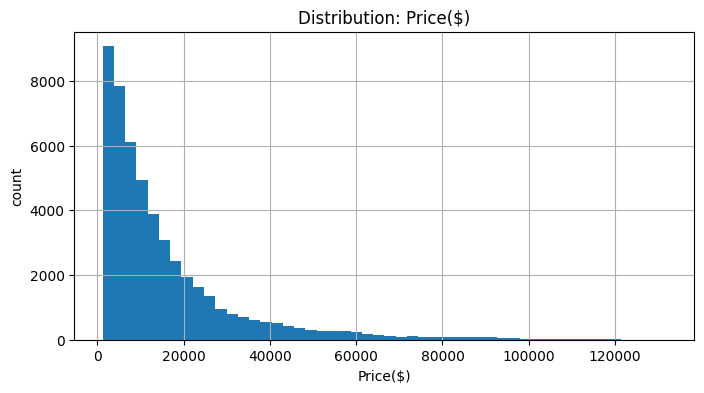

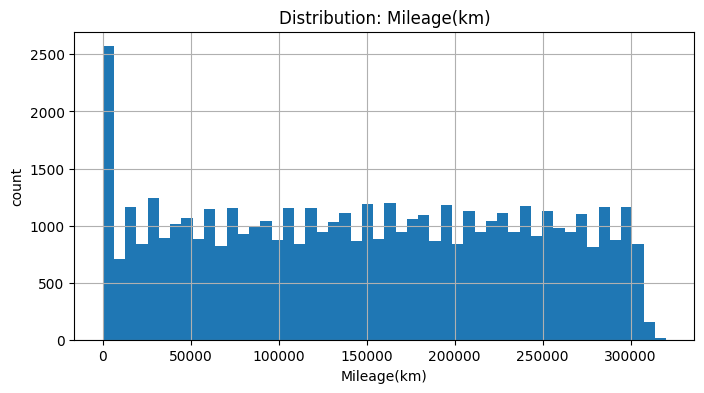

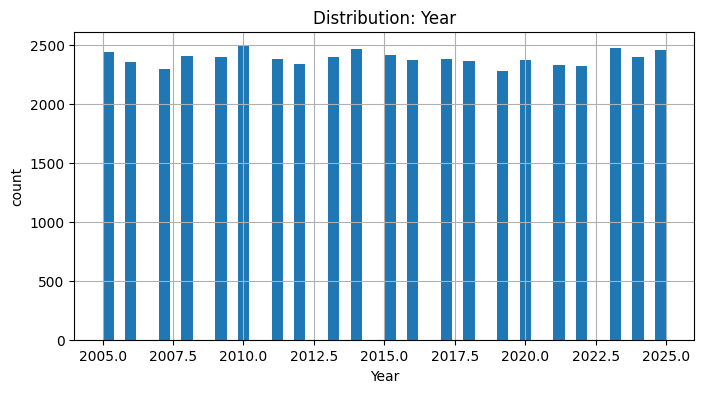

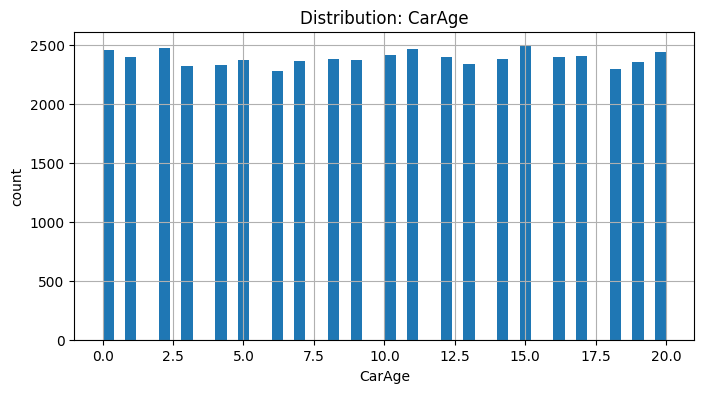

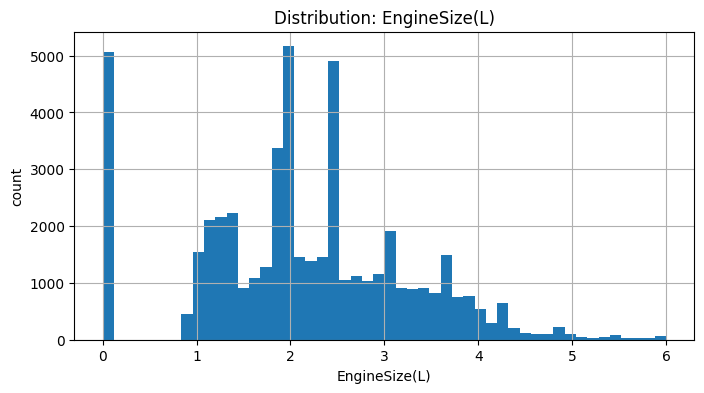

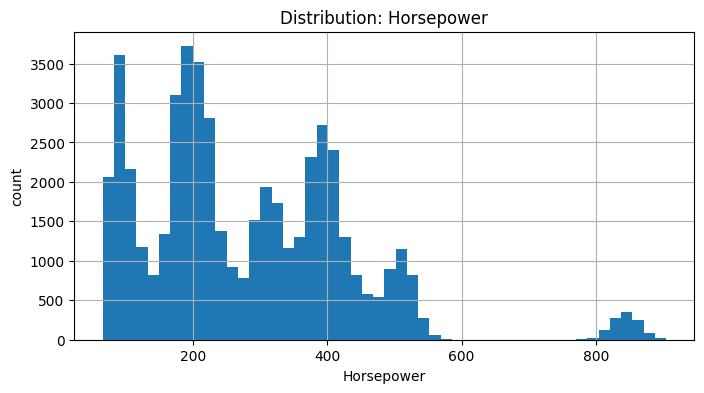

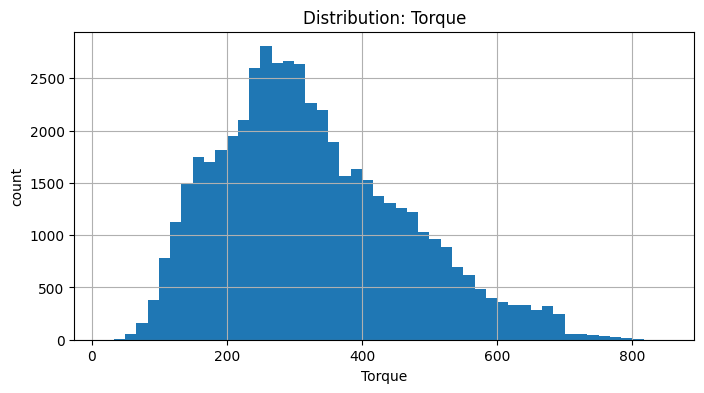

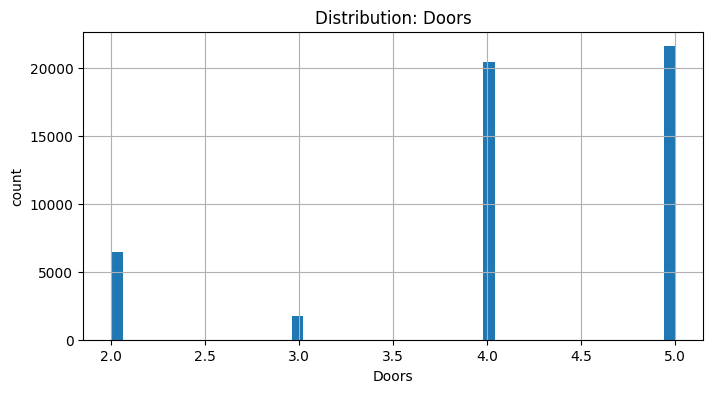

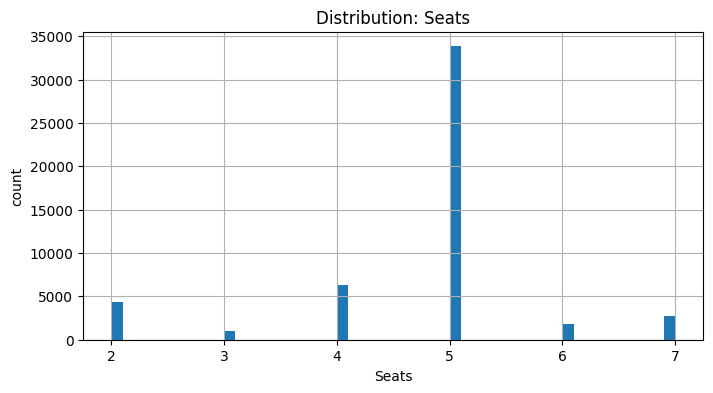

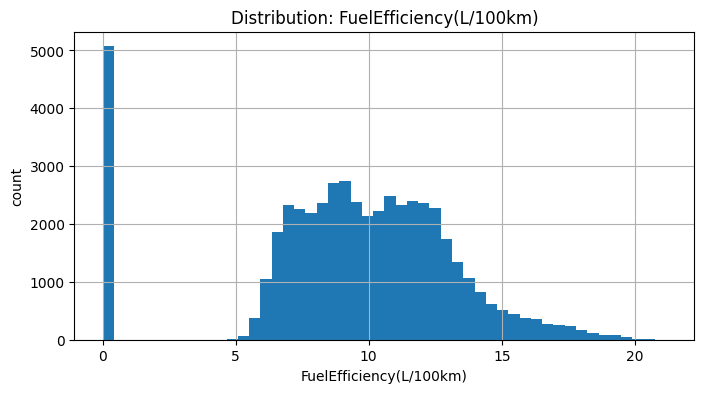

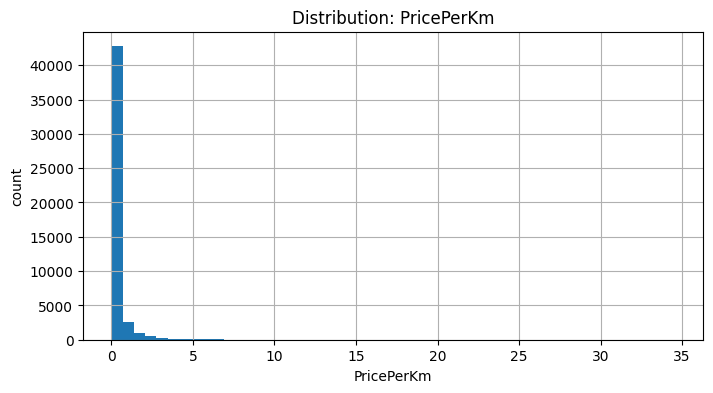

In [10]:
for col in num_cols:
    if col in df.columns:
        df[col].dropna().hist(bins=50)
        plt.title(f"Distribution: {col}")
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()

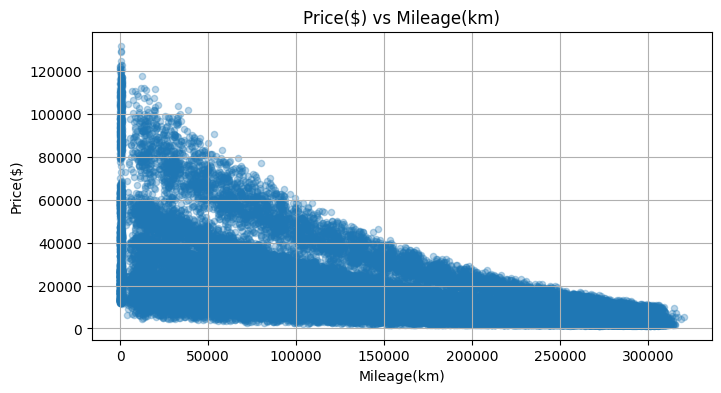

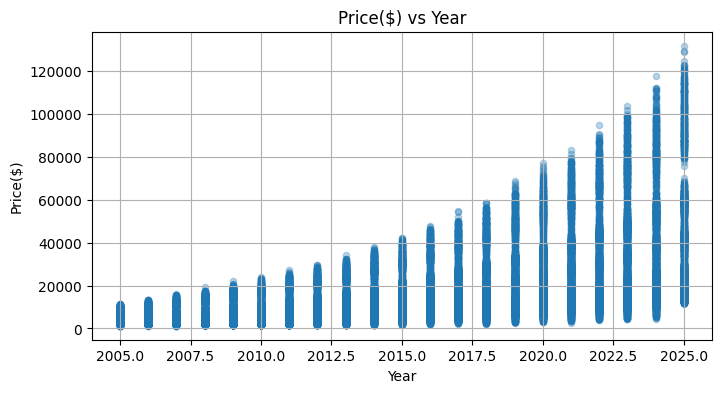

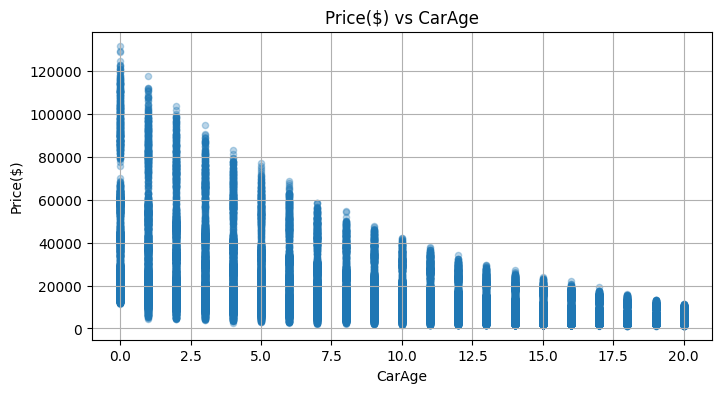

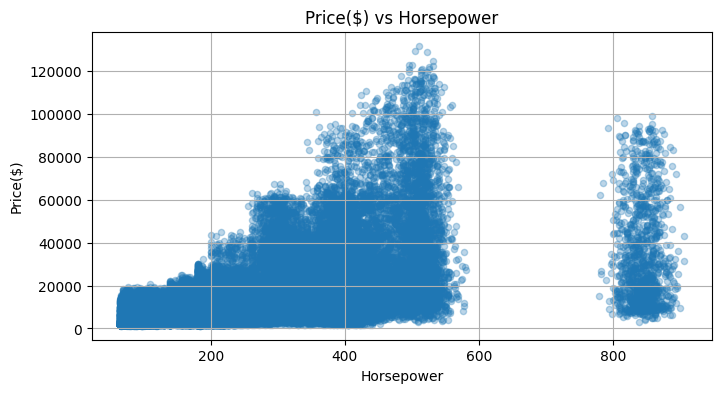

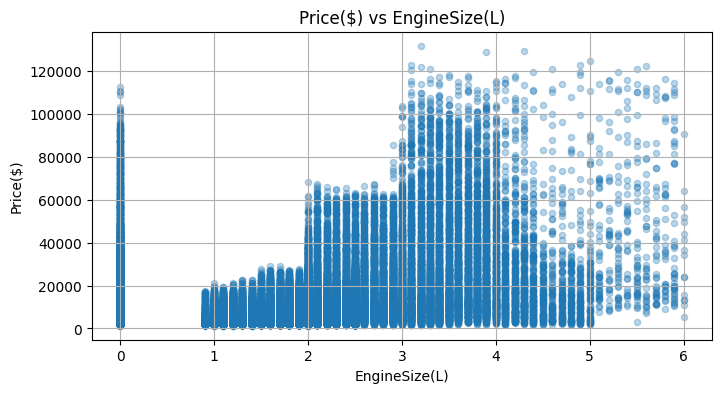

In [11]:
# Scatter plots to check relationships with target
if "Price($)" in df.columns:
    for x in ["Mileage(km)", "Year", "CarAge", "Horsepower", "EngineSize(L)"]:
        if x in df.columns:
            df.plot(kind="scatter", x=x, y="Price($)", alpha=0.3)
            plt.title(f"Price($) vs {x}")
            plt.show()


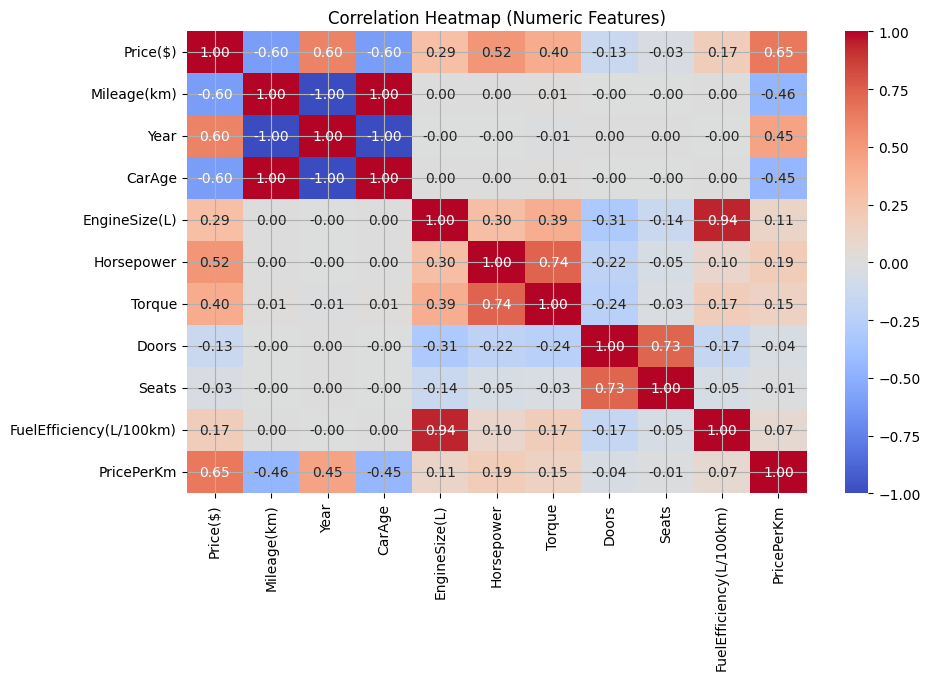

Correlation with Price($):


Price($)                   1.000000
PricePerKm                 0.651831
Year                       0.602840
Horsepower                 0.518673
Torque                     0.400364
EngineSize(L)              0.288117
FuelEfficiency(L/100km)    0.172546
Seats                     -0.033646
Doors                     -0.133196
Mileage(km)               -0.602462
CarAge                    -0.602840
Name: Price($), dtype: float64

In [12]:
import seaborn as sns

num_df = df[num_cols].copy()

plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# Focus on correlation with Price
if "Price($)" in num_df.columns:
    corr = num_df.corr()["Price($)"].sort_values(ascending=False)
    print("Correlation with Price($):")
    display(corr)


In [13]:
CURRENT_YEAR = 2025
check = CURRENT_YEAR - df["Year"]

mismatch = (df["CarAge"] != check).sum()
print(f"Mismatched rows: {mismatch} / {len(df)}")

# Correlation check
print("Correlation between Year and CarAge:", df[["Year", "CarAge"]].corr())

Mismatched rows: 0 / 50100
Correlation between Year and CarAge:         Year  CarAge
Year     1.0    -1.0
CarAge  -1.0     1.0


In [14]:
df["derived_ppk"] = df["Price($)"] / df["Mileage(km)"].replace(0, np.nan)

corr_ppk = df[["PricePerKm", "Price($)", "Mileage(km)", "derived_ppk"]].corr()
print(corr_ppk)

# Compare the given PricePerKm with derived one
diff = (df["PricePerKm"] - df["derived_ppk"]).abs().mean()
print("Average difference between PricePerKm and derived:", diff)

             PricePerKm  Price($)  Mileage(km)  derived_ppk
PricePerKm     1.000000  0.651831    -0.455668     0.999994
Price($)       0.651831  1.000000    -0.602462     0.094841
Mileage(km)   -0.455668 -0.602462     1.000000    -0.054090
derived_ppk    0.999994  0.094841    -0.054090     1.000000
Average difference between PricePerKm and derived: 0.002517239306377888


# Data Audit Summary

- Shape: 50,100 rows × 25 columns
- Target column: Price($)
- Categorical columns: Brand, Model, FuelType, Transmission, DriveType, BodyType, Color, Interior, BodyType, City, AccidentHistory, Insurance, RegistrationStatus.
- Numeric columns: Year, CarAge, Mileage(km), EngineSize(L), Horsepower, Torque, Doors, Seats, FuelEfficiency(L/100km), PricePerKm
- Missing values: [PricePerKm - 2463]
- Duplicates: 100
- Options column: multi-valued, created OptionsCount feature
- Price distribution: right-skewed with outliers
- Strongest correlations with Price: Year (+), Mileage (–), Horsepower (+)
